<a href="https://colab.research.google.com/github/rushan3101/Online-Payment-Fraud-Detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Payment Fraud Detection using Machine Learning

This notebook demonstrates an end-to-end fraud detection pipeline.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online Payments Fraud Detection/payments_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


## Data Exploration

In [ ]:
df[df.type=="PAYMENT"]   ##TYPE==PAYMENT - MERCHANT TRANSACTION - NON FRAUD

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0


In [ ]:
df[df.type=="TRANSFER"]  ##TYPE==TRANSFER - TRANSFER BETWEEN ACCOUNTS

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0
...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
df.describe(include=["object"],exclude=["int64","float64"])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1530544995,C1286084959
freq,2237500,3,113


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


,proportion
isFraud,
0,0.998709
1,0.001291


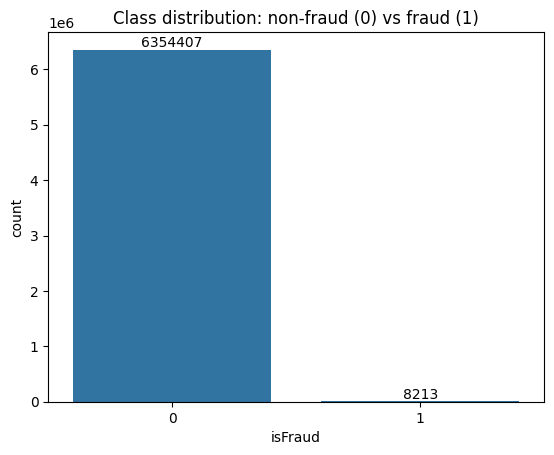

In [ ]:
display(df['isFraud'].value_counts(normalize=True))
ax = sns.countplot(x='isFraud', data=df)
plt.title("Class distribution: non‑fraud (0) vs fraud (1)")

# Add text labels with exact values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:** This plot shows the distribution of fraudulent and non-fraudulent transactions. There is a significant class imbalance, with a much larger number of non-fraudulent transactions. This suggests that the dataset is highly imbalanced and special techniques might be needed during model training to handle this imbalance.

## Exploratory Data Analysis

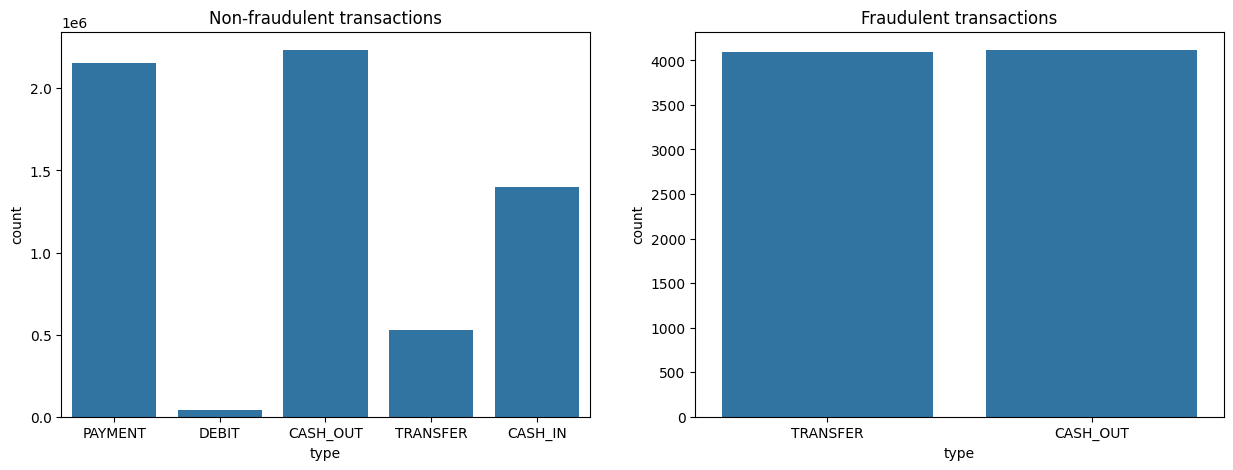

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Transaction types count")
sns.countplot(x='type',data=df[df.isFraud==0],ax=ax[0])
ax[0].set_title("Non-fraudulent transactions")
sns.countplot(x='type',data=df[df.isFraud==1],ax=ax[1])
ax[1].set_title("Fraudulent transactions")
plt.show()

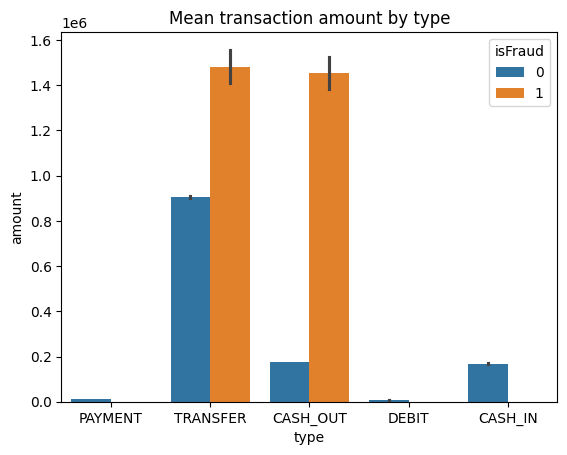

In [ ]:
sns.barplot(x='type',hue="isFraud", y='amount', data=df)
plt.title("Mean transaction amount by type")
plt.show()

**Insight:** The first plot shows the count of each transaction type in the dataset. The second plot shows the average transaction amount for each type. 'CASH_OUT' and 'TRANSFER' have higher average transaction amounts compared to 'PAYMENT' and 'DEBIT'.

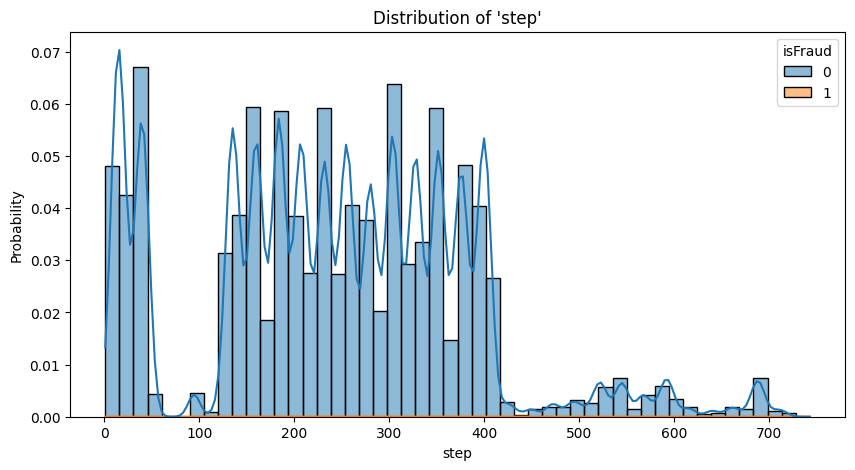

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="step",hue="isFraud",stat='probability', bins=50, kde=True)
plt.title("Distribution of 'step'")
plt.show()


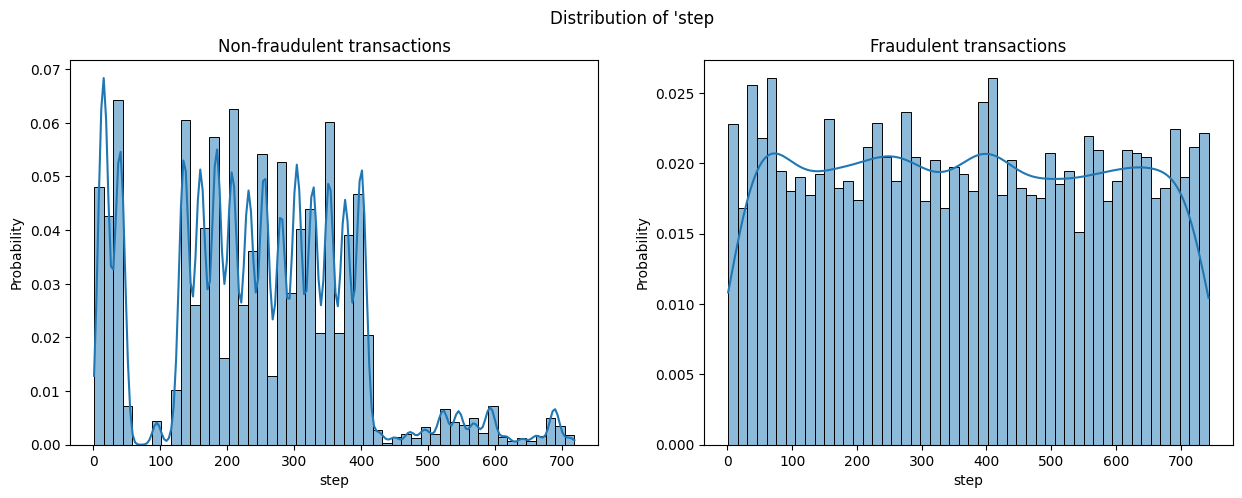

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Distribution of 'step")
sns.histplot(data=df[df['isFraud']==0], x="step",stat='probability', bins=50, kde=True,ax=ax[0])
ax[0].set_title("Non-fraudulent transactions")
sns.histplot(data=df[df['isFraud']==1], x="step",stat='probability', bins=50, kde=True,ax=ax[1])
ax[1].set_title("Fraudulent transactions")
plt.show()

**Insight:** This histogram shows the distribution of the 'step' variable, which likely represents a time step or hour. The transactions are spread across different steps, with some steps having higher transaction volumes than others. This could indicate that certain time periods are more active for transactions.

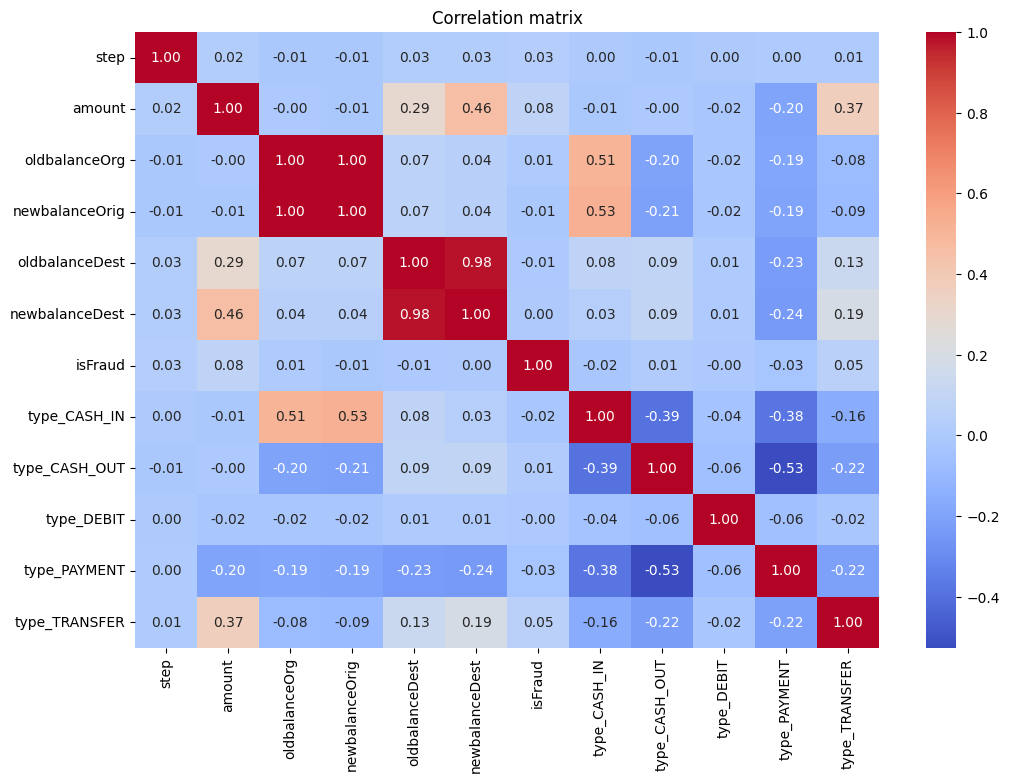

In [ ]:

df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['type'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()


**Insight:** This heatmap displays the correlation matrix of the features after encoding categorical variables. It helps visualize the relationships between different features and the target variable ('isFraud'). High correlation values (positive or negative) indicate strong linear relationships, which can be useful for feature selection or understanding feature interactions.

## Data Preprocessing

**Explanation:** In this step, we prepare the data for machine learning models. We use one-hot encoding on the 'type' column to convert the categorical transaction types into numerical features that the models can understand. We then define our features (X) and target variable (y). Finally, we split the data into training and testing sets, ensuring that the proportion of fraudulent transactions is maintained in both sets using stratification. This split is crucial for evaluating the model's performance on unseen data.

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [7]:
cat = ['type']
num = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [8]:
X = df.drop(columns=['isFraud','nameOrig', 'nameDest','step'])

y = df['isFraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((4453834, 6), (1908786, 6))

In [ ]:
y_train.value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [ ]:
y_test.value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [10]:
preprocess = ColumnTransformer(
        transformers = [
            ('cat', OneHotEncoder(), cat),
            ('num', StandardScaler(), num)
        ],
        remainder = 'drop'
)


## **Modeling**

**Explanation:** Here, we define and train different machine learning models to detect fraud. We are using Logistic Regression, XGBoost, and RandomForest classifiers. For each model, we fit it to the training data and then evaluate its performance using the Precision, Recall, ROC AUC and PR-AUC scores on the testing sets. A higher AUC score indicates better performance in distinguishing between fraudulent and non-fraudulent transactions.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_pipeline = Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])

In [ ]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
print(f"Logistic Regression —\n")
display(confusion_matrix(y_test, log_pipeline.predict(X_test)))
print()
print(classification_report(y_test, log_pipeline.predict(X_test)))

Logistic Regression —



array([[1906244,      78],
       [   1575,     889]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.92      0.36      0.52      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.68      0.76   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9827


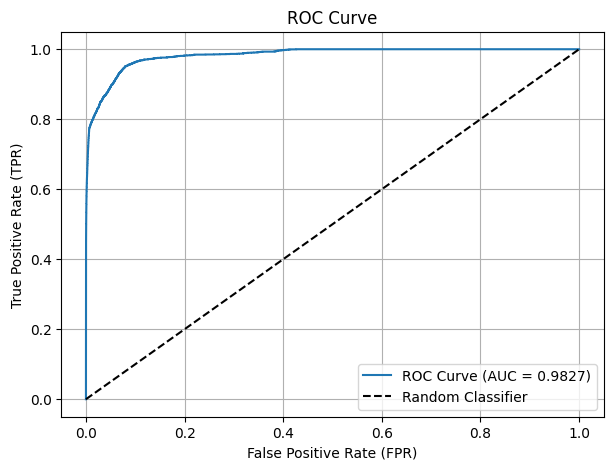

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = log_pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.5517


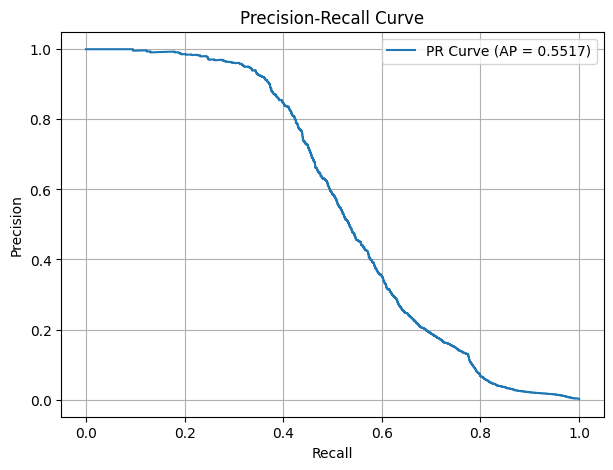

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


#### Logistic Regression (Class weight = balanced)

In [ ]:
log_pipeline2 = Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [ ]:
log_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
print(f"Logistic Regression —\n")
display(confusion_matrix(y_test, log_pipeline2.predict(X_test)))
print()
print(classification_report(y_test, log_pipeline2.predict(X_test)))

Logistic Regression —



array([[1804747,  101575],
       [    151,    2313]])


              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



AUC-ROC Score: 0.9891


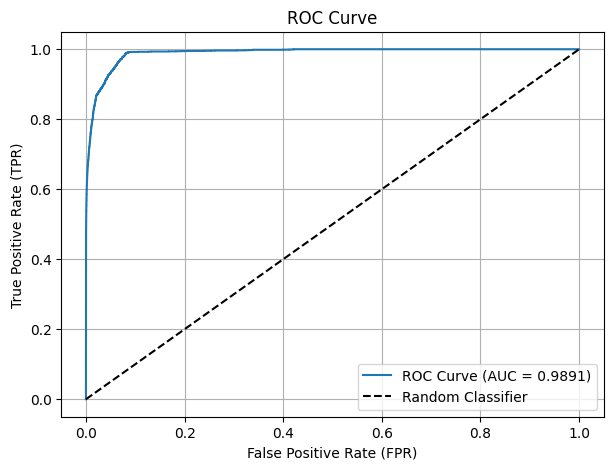

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = log_pipeline2.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


AUC-ROC Score: 0.0109


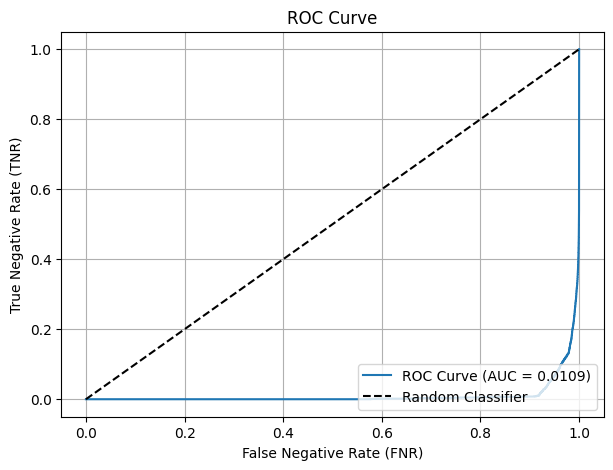

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (non fraud = 0)
y_proba = log_pipeline2.predict_proba(X_test)[:, 0]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Negative Rate (FNR)")
plt.ylabel("True Negative Rate (TNR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.5456


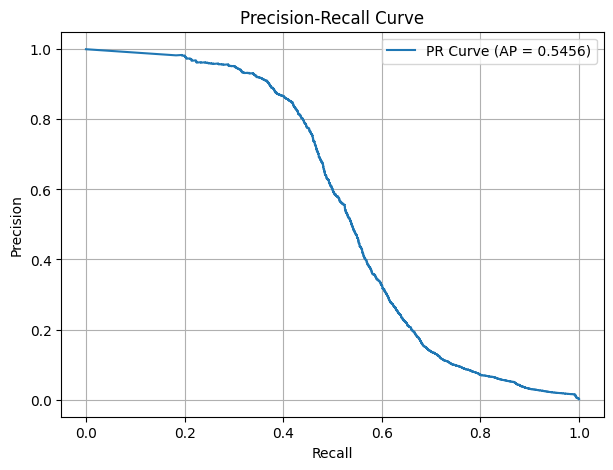

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


#### SMOTENC + Logistic Regression

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

pre_smote = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OrdinalEncoder(), cat)
    ],
    remainder='drop'
)


In [14]:
from sklearn.preprocessing import OneHotEncoder

num_indices = list(range(len(num)))
cat_indices = list(range(len(num), len(num) + len(cat)))

post_smote = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_indices),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_indices)
    ],
    remainder='passthrough'
)


In [15]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('pre_smote', pre_smote),

    ('smote', SMOTENC(
        categorical_features=cat_indices,
        random_state=42
    )),

    ('post_smote', post_smote),

    ('model', LogisticRegression(max_iter=1000)
    )
])


In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre_smote',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('smote', SMOTENC(categorical_features=[5], random_state=42)),
                ('post_smote',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [5])])),
                ('model', LogisticRegression(max_iter=1000))])

In [18]:
print(f"SMOTENC + Logistic Regression —\n")
y_pred = pipeline.predict(X_test)
display(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

SMOTENC + Logistic Regression —



array([[1804769,  101553],
       [    124,    2340]])


              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



AUC-ROC Score: 0.9895


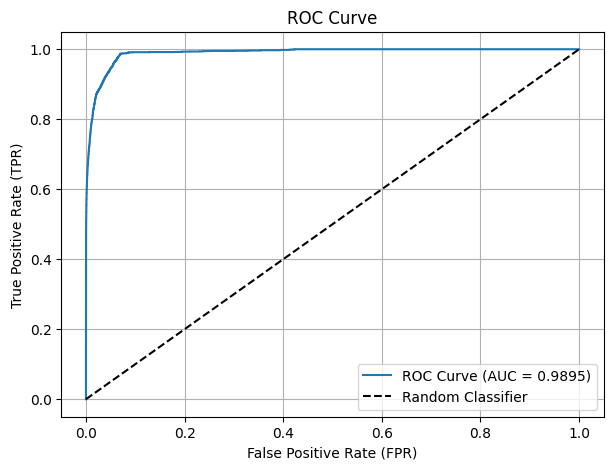

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.5387


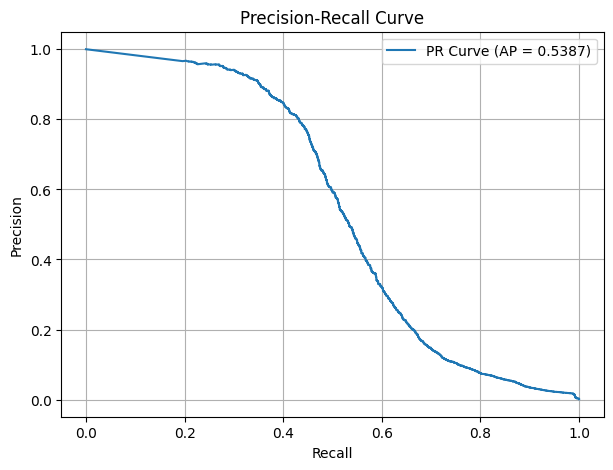

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

In [ ]:
# Train
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [ ]:
print(f"Random Forest —\n")
display(confusion_matrix(y_test, rf_pipeline.predict(X_test)))
print()
print(classification_report(y_test, rf_pipeline.predict(X_test)))

Random Forest —



array([[1906263,      59],
       [    555,    1909]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.77      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9992


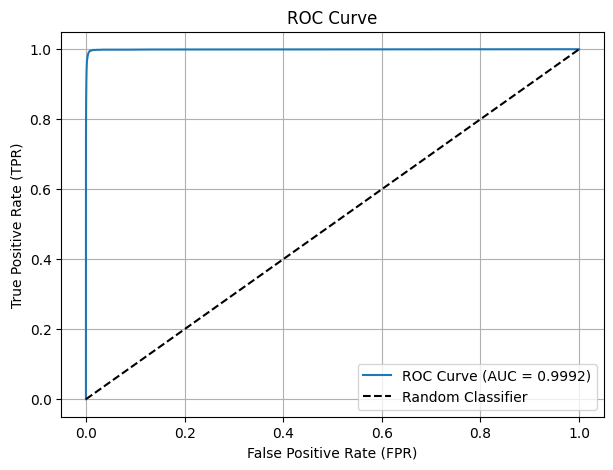

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.9249


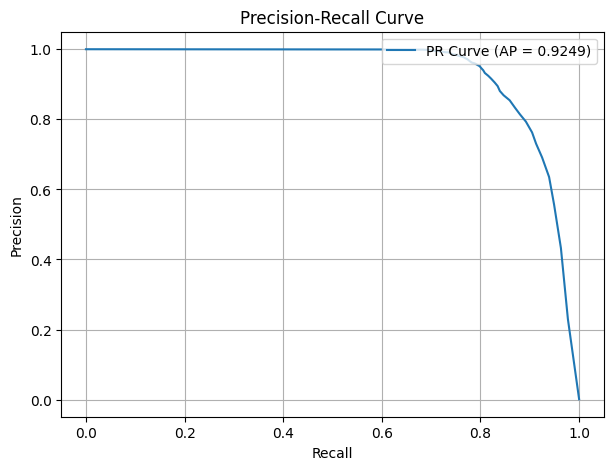

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for t in thresholds:
    y_pred = (y_proba_rf >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")


Threshold=0.10  Precision=0.691  Recall=0.925
Threshold=0.20  Precision=0.834  Recall=0.870
Threshold=0.30  Precision=0.905  Recall=0.829
Threshold=0.40  Precision=0.945  Recall=0.802
Threshold=0.50  Precision=0.965  Recall=0.779
Threshold=0.60  Precision=0.979  Recall=0.761
Threshold=0.70  Precision=0.985  Recall=0.744
Threshold=0.80  Precision=0.991  Recall=0.731
Threshold=0.90  Precision=0.995  Recall=0.706
Threshold=1.00  Precision=0.999  Recall=0.606


In [ ]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0.1,0.2,10)

for t in thresholds:
    y_pred = (y_proba_rf >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")


Threshold=0.10  Precision=0.691  Recall=0.925
Threshold=0.11  Precision=0.730  Recall=0.913
Threshold=0.12  Precision=0.763  Recall=0.905
Threshold=0.13  Precision=0.763  Recall=0.905
Threshold=0.14  Precision=0.794  Recall=0.892
Threshold=0.16  Precision=0.794  Recall=0.892
Threshold=0.17  Precision=0.814  Recall=0.880
Threshold=0.18  Precision=0.814  Recall=0.880
Threshold=0.19  Precision=0.834  Recall=0.870
Threshold=0.20  Precision=0.834  Recall=0.870


In [ ]:
y_pred = (y_proba_rf >= 0.145).astype(int)
display(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

array([[1905750,     572],
       [    266,    2198]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.79      0.89      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.90      0.95      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



#### Random Forest(class_weight=balanced)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rfb_pipeline = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

In [52]:
# Train
rfb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [56]:
print(f"Random Forest(class_weight=balanced) —\n")
display(confusion_matrix(y_test, rfb_pipeline.predict(X_test)))
print()
print(classification_report(y_test, rfb_pipeline.predict(X_test)))

Random Forest(class_weight=balanced) —



array([[1906260,      62],
       [    562,    1902]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.77      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9912


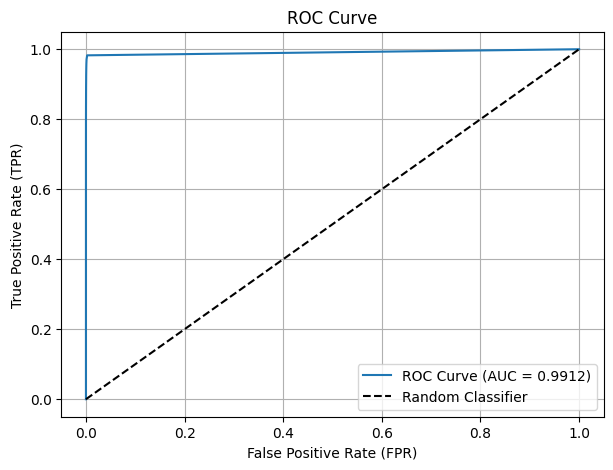

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = rfb_pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.9342


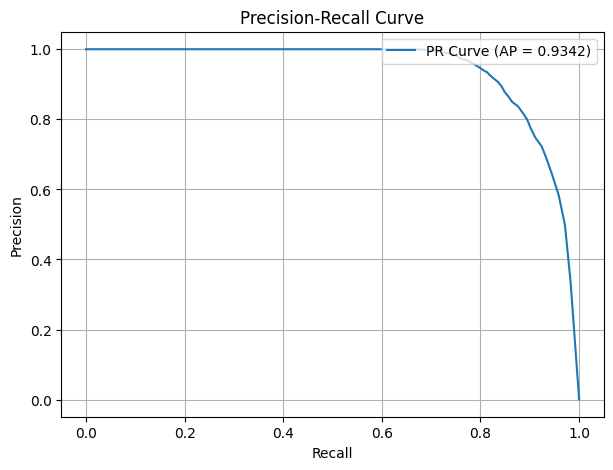

In [75]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


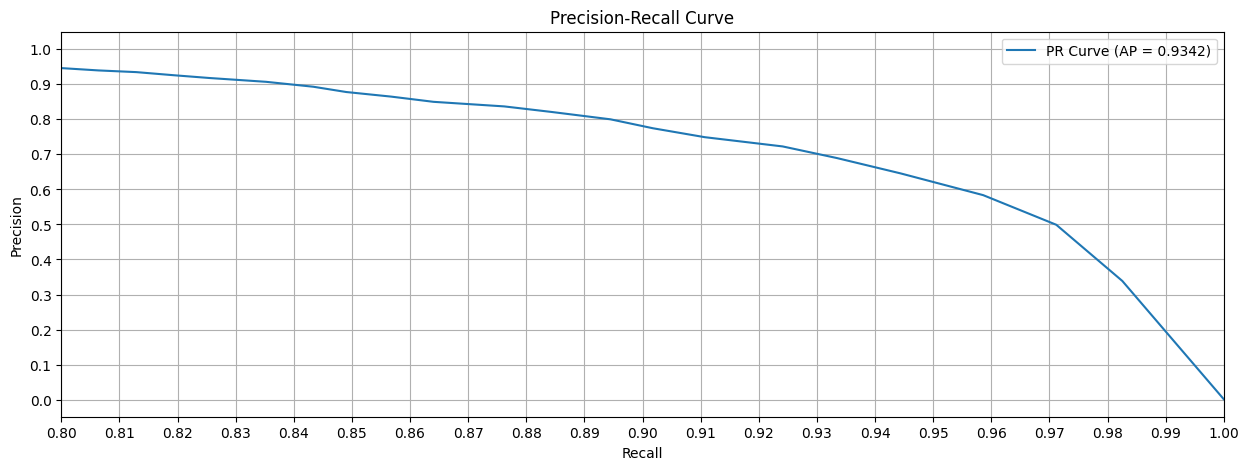

In [61]:
# Plot Precision-Recall curve
plt.figure(figsize=(15, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.xlim(0.8,1.0)
plt.yticks(np.arange(0.0, 1.01, 0.1))
plt.xticks(np.arange(0.8, 1.01, 0.01))
plt.grid(True)
plt.show()

In [63]:
from sklearn.metrics import precision_score, recall_score

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")


Threshold=0.10  Precision=0.689  Recall=0.933
Threshold=0.20  Precision=0.821  Recall=0.884
Threshold=0.30  Precision=0.893  Recall=0.843
Threshold=0.40  Precision=0.939  Recall=0.806
Threshold=0.50  Precision=0.966  Recall=0.777
Threshold=0.60  Precision=0.976  Recall=0.756
Threshold=0.70  Precision=0.985  Recall=0.743
Threshold=0.80  Precision=0.991  Recall=0.726
Threshold=0.90  Precision=0.997  Recall=0.700
Threshold=1.00  Precision=1.000  Recall=0.599


In [64]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0.1,0.2,10)

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")


Threshold=0.10  Precision=0.689  Recall=0.933
Threshold=0.11  Precision=0.723  Recall=0.924
Threshold=0.12  Precision=0.749  Recall=0.911
Threshold=0.13  Precision=0.749  Recall=0.911
Threshold=0.14  Precision=0.774  Recall=0.902
Threshold=0.16  Precision=0.774  Recall=0.902
Threshold=0.17  Precision=0.800  Recall=0.894
Threshold=0.18  Precision=0.800  Recall=0.894
Threshold=0.19  Precision=0.821  Recall=0.884
Threshold=0.20  Precision=0.821  Recall=0.884


In [74]:
y_pred = (y_proba >= 0.17).astype(int)
display(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

array([[1905771,     551],
       [    260,    2204]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.80      0.89      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.90      0.95      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



#### Balanced Random Forest

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline

brf_pipeline = Pipeline([
    ('prep', preprocess),
    ('model', BalancedRandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

In [ ]:
# Train
brf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model',
                 BalancedRandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                random_state=42))])

In [ ]:
print(f"Random Forest (Balanced) —\n")
display(confusion_matrix(y_test, brf_pipeline.predict(X_test)))
print()
print(classification_report(y_test, brf_pipeline.predict(X_test)))

Random Forest (Balanced) —



array([[1889996,   16326],
       [     12,    2452]])


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.13      1.00      0.23      2464

    accuracy                           0.99   1908786
   macro avg       0.57      0.99      0.61   1908786
weighted avg       1.00      0.99      0.99   1908786



AUC-ROC Score: 0.9992


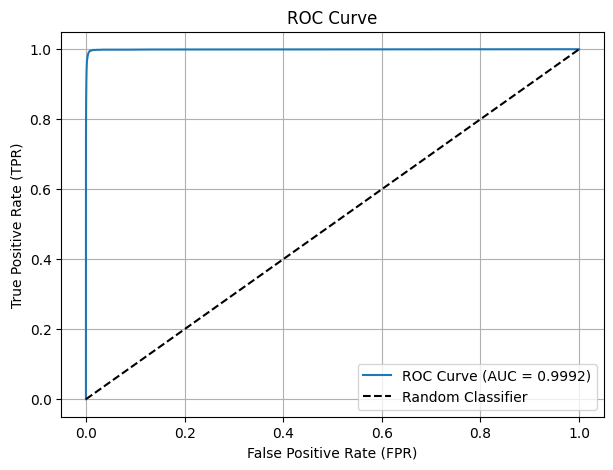

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = brf_pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.8417


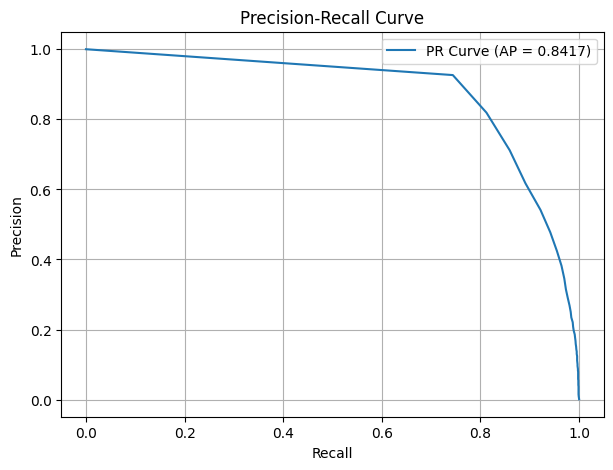

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


#### SMOTENC + Random Forest

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

pre_smote = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OrdinalEncoder(), cat)
    ],
    remainder='drop'
)


In [22]:
from sklearn.preprocessing import OneHotEncoder

num_indices = list(range(len(num)))
cat_indices = list(range(len(num), len(num) + len(cat)))

post_smote = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_indices),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_indices)
    ],
    remainder='passthrough'
)


In [24]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier


pipeline_rf_smotenc = Pipeline([
    ('pre_smote', pre_smote),

    ('smote', SMOTENC(
        categorical_features=cat_indices,
        random_state=42
    )),

    ('post_smote', post_smote),

    ('model', RandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])


In [26]:
pipeline_rf_smotenc.fit(X_train, y_train)

Pipeline(steps=[('pre_smote',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('smote', SMOTENC(categorical_features=[5], random_state=42)),
                ('post_smote',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [5])])),
                ('model',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [27]:
print(f"SMOTENC + Random Forest —\n")
y_pred = pipeline_rf_smotenc.predict(X_test)
display(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

SMOTENC + Random Forest —



array([[1904738,    1584],
       [    143,    2321]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.59      0.94      0.73      2464

    accuracy                           1.00   1908786
   macro avg       0.80      0.97      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9976


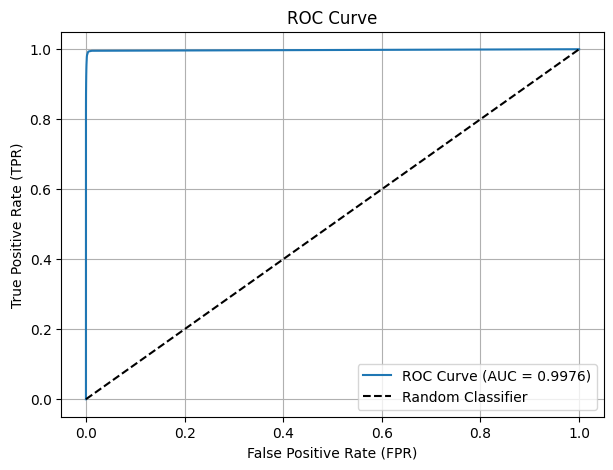

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = pipeline_rf_smotenc.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.9050


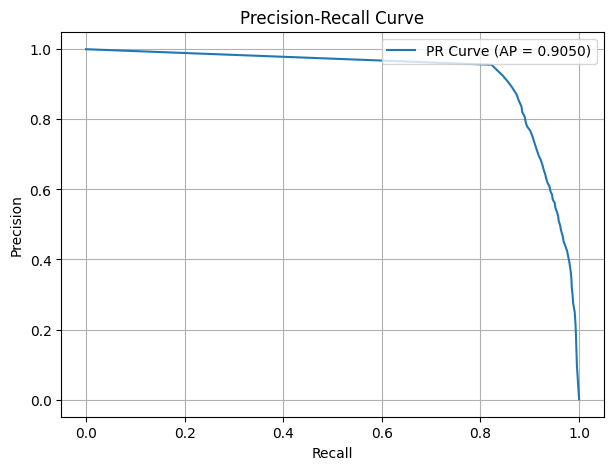

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


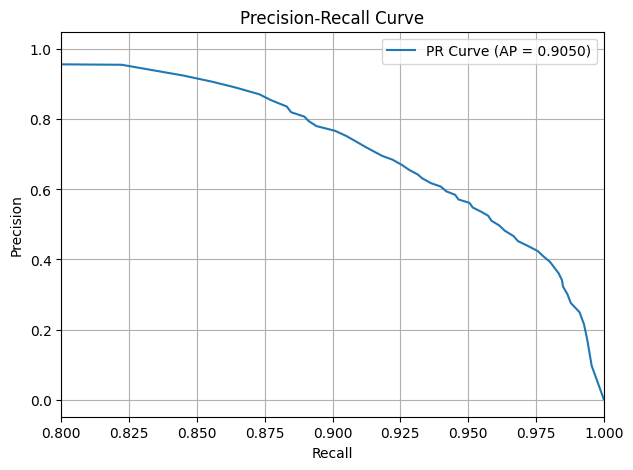

In [31]:
# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.xlim(0.8,1.0)
plt.grid(True)
plt.show()

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline([
    ('prep', preprocess),
    ('model', XGBClassifier(
        eval_metric='aucpr',
        n_jobs=-1
    ))
])

In [ ]:
# Train
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['type']),
                                                 ('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_sto...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [ ]:
print(f"XGBoost —\n")
display(confusion_matrix(y_test, xgb_pipeline.predict(X_test)))
print()
print(classification_report(y_test, xgb_pipeline.predict(X_test)))

XGBoost —



array([[1906237,      85],
       [    618,    1846]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.96      0.75      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9964


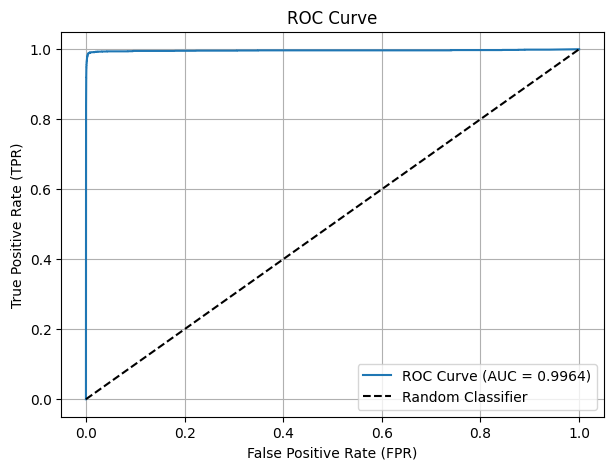

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.9155


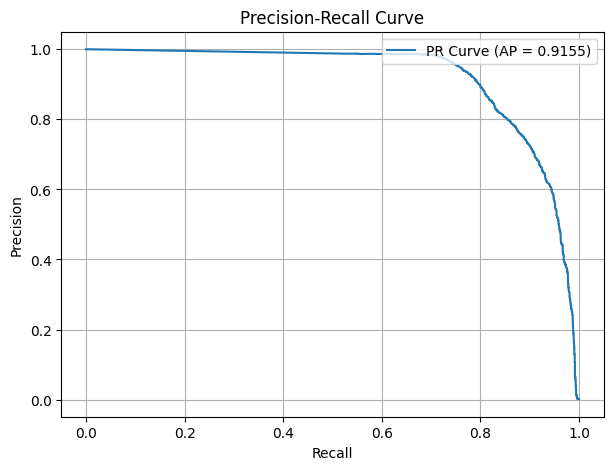

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Get predicted probabilities for positive class (fraud = 1)
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")

Threshold=0.10  Precision=0.667  Recall=0.921
Threshold=0.20  Precision=0.810  Recall=0.846
Threshold=0.30  Precision=0.891  Recall=0.802
Threshold=0.40  Precision=0.937  Recall=0.769
Threshold=0.50  Precision=0.956  Recall=0.749
Threshold=0.60  Precision=0.964  Recall=0.738
Threshold=0.70  Precision=0.973  Recall=0.727
Threshold=0.80  Precision=0.976  Recall=0.722
Threshold=0.90  Precision=0.980  Recall=0.713
Threshold=1.00  Precision=0.987  Recall=0.533


In [ ]:
thresholds = np.linspace(0.1,0.2,10)

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")

Threshold=0.10  Precision=0.667  Recall=0.921
Threshold=0.11  Precision=0.696  Recall=0.910
Threshold=0.12  Precision=0.712  Recall=0.905
Threshold=0.13  Precision=0.731  Recall=0.895
Threshold=0.14  Precision=0.751  Recall=0.887
Threshold=0.16  Precision=0.761  Recall=0.879
Threshold=0.17  Precision=0.776  Recall=0.872
Threshold=0.18  Precision=0.784  Recall=0.867
Threshold=0.19  Precision=0.798  Recall=0.855
Threshold=0.20  Precision=0.810  Recall=0.846


In [ ]:
y_pred = (y_proba >= 0.20).astype(int)
print(f"XGBoost —\n")
display(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

XGBoost —



array([[1905833,     489],
       [    379,    2085]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.81      0.85      0.83      2464

    accuracy                           1.00   1908786
   macro avg       0.90      0.92      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



#### SMOTENC + Xgboost

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

pre_smote = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OrdinalEncoder(), cat)
    ],
    remainder='drop'
)


In [33]:
from sklearn.preprocessing import OneHotEncoder

num_indices = list(range(len(num)))
cat_indices = list(range(len(num), len(num) + len(cat)))

post_smote = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_indices),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_indices)
    ],
    remainder='passthrough'
)


In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier


pipeline_xgb_smotenc = Pipeline([
    ('pre_smote', pre_smote),

    ('smote', SMOTENC(
        categorical_features=cat_indices,
        random_state=42
    )),

    ('post_smote', post_smote),

    ('model', XGBClassifier(
        eval_metric='aucpr',
        n_jobs=-1
    ))
])


In [35]:
pipeline_xgb_smotenc.fit(X_train, y_train)

Pipeline(steps=[('pre_smote',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type'])])),
                ('smote', SMOTENC(categorical_features=[5], random_state=42)),
                ('post_smote',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [36]:
print(f"SMOTENC + XGBoost —\n")
y_pred = pipeline_xgb_smotenc.predict(X_test)
display(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

SMOTENC + XGBoost —



array([[1902210,    4112],
       [     23,    2441]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.37      0.99      0.54      2464

    accuracy                           1.00   1908786
   macro avg       0.69      0.99      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786



AUC-ROC Score: 0.9994


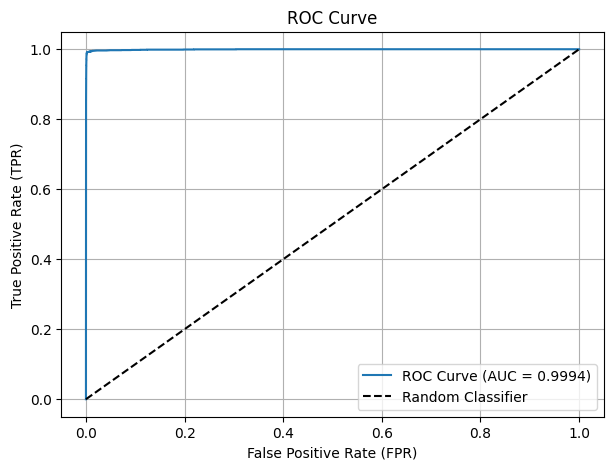

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (fraud = 1)
y_proba = pipeline_xgb_smotenc.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


PR-AUC Score: 0.9404


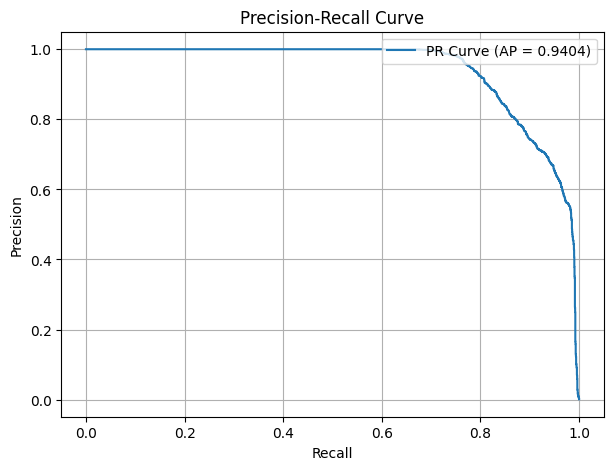

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# PR-AUC score
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


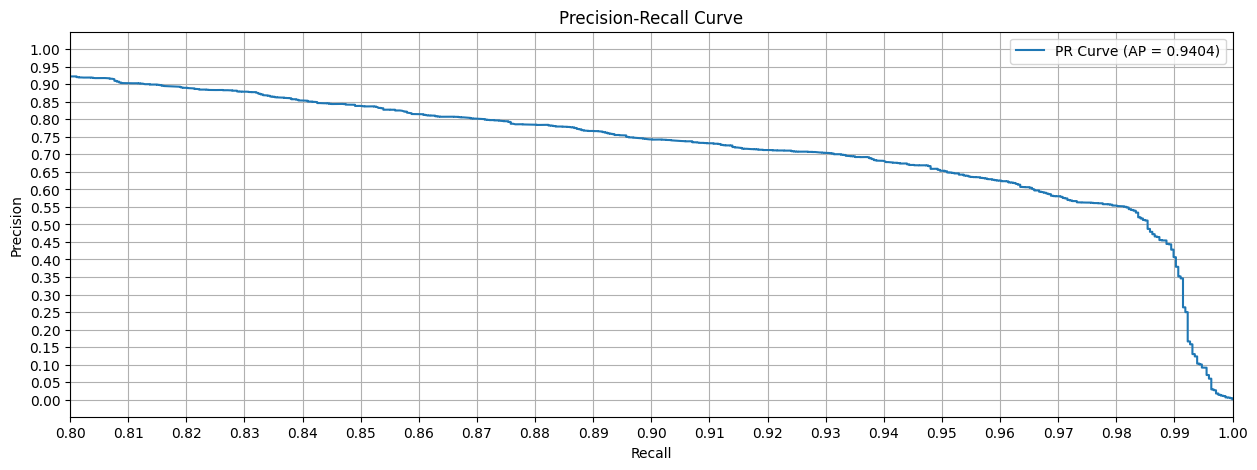

In [42]:
# Plot Precision-Recall curve
plt.figure(figsize=(15, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.xlim(0.8,1.0)
plt.yticks(np.arange(0,1.01,0.05))
plt.xticks(np.arange(0.8,1.01,0.01))
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import precision_score, recall_score

# Get predicted probabilities for positive class (fraud = 1)
y_proba = pipeline_xgb_smotenc.predict_proba(X_test)[:, 1]

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.2f}  Precision={p:.3f}  Recall={r:.3f}")

Threshold=0.10  Precision=0.153  Recall=0.993
Threshold=0.20  Precision=0.224  Recall=0.992
Threshold=0.30  Precision=0.281  Recall=0.991
Threshold=0.40  Precision=0.333  Recall=0.991
Threshold=0.50  Precision=0.373  Recall=0.991
Threshold=0.60  Precision=0.410  Recall=0.990
Threshold=0.70  Precision=0.449  Recall=0.989
Threshold=0.80  Precision=0.487  Recall=0.986
Threshold=0.90  Precision=0.536  Recall=0.983
Threshold=1.00  Precision=0.000  Recall=0.000


In [44]:
thresholds = np.linspace(0.99,1.0,10)

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    print(f"Threshold={t:.3f}  Precision={p:.3f}  Recall={r:.3f}")

Threshold=0.990  Precision=0.763  Recall=0.892
Threshold=0.991  Precision=0.794  Recall=0.875
Threshold=0.992  Precision=0.827  Recall=0.854
Threshold=0.993  Precision=0.862  Recall=0.837
Threshold=0.994  Precision=0.898  Recall=0.815
Threshold=0.996  Precision=0.929  Recall=0.796
Threshold=0.997  Precision=0.958  Recall=0.770
Threshold=0.998  Precision=0.978  Recall=0.754
Threshold=0.999  Precision=0.986  Recall=0.735
Threshold=1.000  Precision=0.000  Recall=0.000


In [50]:
y_pred = (y_proba >= 0.991).astype(int)
print(f"XGBoost —\n")
display(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

XGBoost —



array([[1905751,     571],
       [    306,    2158]])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.79      0.88      0.83      2464

    accuracy                           1.00   1908786
   macro avg       0.90      0.94      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



## **Conclusion**

This notebook explored various machine learning models and techniques for online payment fraud detection, addressing the inherent class imbalance in the dataset. The primary goal was to identify models that effectively detect fraudulent transactions (class 1) while considering metrics like Precision, Recall, and PR-AUC.

The dataset exhibited a severe class imbalance, with fraudulent transactions making up only ~0.13% of the total. This was visualized and confirmed during the data exploration phase.

Here's a summary of the models used and their performance on the test set for the fraud class (class 1):

### Models and Techniques:

1.  **Logistic Regression (Default):**
    *   **Precision (Fraud):** 0.92
    *   **Recall (Fraud):** 0.36
    *   **PR-AUC:** 0.5517
    *   *Insight:* Achieves high precision but suffers from very low recall, indicating it misses a large portion of fraudulent transactions.

2.  **Logistic Regression (Class Weight='balanced'):**
    *   **Precision (Fraud):** 0.02
    *   **Recall (Fraud):** 0.94
    *   **PR-AUC:** 0.5456
    *   *Insight:* Significantly improves recall at the cost of extremely low precision, leading to many false positives.

3.  **SMOTENC + Logistic Regression:**
    *   **Precision (Fraud):** 0.02
    *   **Recall (Fraud):** 0.95
    *   **PR-AUC:** 0.5387
    *   *Insight:* Similar performance to `class_weight='balanced'` Logistic Regression, achieving high recall with very low precision for fraud.

4.  **Random Forest (Default):**
    *   **Precision (Fraud):** 0.97
    *   **Recall (Fraud):** 0.77
    *   **PR-AUC:** 0.9249
    *   *Insight:* Offers a much better balance between precision and recall than Logistic Regression, identifying a good portion of frauds with high accuracy.

5.  **Random Forest (Class Weight='balanced'):**
    *   **Precision (Fraud):** 0.97
    *   **Recall (Fraud):** 0.77
    *   **PR-AUC:** 0.9342
    *   *Insight:* Similar to default Random Forest with slightly higher PR-AUC.

6.  **Balanced Random Forest:**
    *   **Precision (Fraud):** 0.13
    *   **Recall (Fraud):** 1.00
    *   **PR-AUC:** 0.8417
    *   *Insight:* Achieves perfect recall (detects all frauds) but with very low precision, resulting in a high number of false positives.
  
7.  **SMOTENC + Random Forest:**
    *   **Precision (Fraud):** 0.59
    *   **Recall (Fraud):** 0.94
    *   **PR-AUC:** 0.9050
    *   *Insight:* Provides a strong balance, achieving high recall with decent precision, and a good PR-AUC, suggesting it's a robust model for fraud detection.

8.  **XGBoost (Default):**
    *   **Precision (Fraud):** 0.96
    *   **Recall (Fraud):** 0.75
    *   **PR-AUC:** 0.9155
    *   *Insight:* Similar to default Random Forest, providing a good trade-off between precision and recall, and a high PR-AUC.

9.  **SMOTENC + XGBoost:**
    *   **Precision (Fraud):** 0.37 (at default threshold 0.5)
    *   **Recall (Fraud):** 0.99 (at default threshold 0.5)
    *   **PR-AUC:** 0.9404
    *   *Insight:* At the default threshold, it yields very high recall but lower precision. However, adjusting the threshold (e.g., to 0.991) can balance this, achieving **Precision ~0.79 and Recall ~0.89**. This flexibility makes it a very powerful model.

### Overall Summary:

For fraud detection, especially in highly imbalanced datasets, **Recall** is often prioritized to minimize missed frauds, even if it means a slightly higher number of false positives. **PR-AUC** is also a more informative metric than ROC-AUC for imbalanced datasets.

*   Models like **Balanced Random Forest** and **SMOTENC + XGBoost (with threshold adjustment)** demonstrated the best **recall** for fraudulent transactions (1.00 and 0.99 respectively), indicating they are very effective at identifying nearly all fraud cases.
*   **SMOTENC + XGBoost** achieved the highest **PR-AUC (0.9404)**, and with threshold tuning, it can strike a good balance between precision (0.79) and recall (0.89), making it a strong candidate for deployment.


In conclusion, resampling techniques like `SMOTENC` and ensemble methods like Random Forest and XGBoost, particularly when combined or with class weighting, significantly improve the detection of fraudulent transactions. The choice between them depends on the specific business requirements regarding the trade-off between precision and recall. **SMOTENC + XGBoost** stands out as providing the best results in this analysis with **89% Recall, 79% Precision for the fraud class and 94.4% PR-AUC.**